Vista previa de los datos:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450  

/tmp/ipykernel_150078/697513106.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


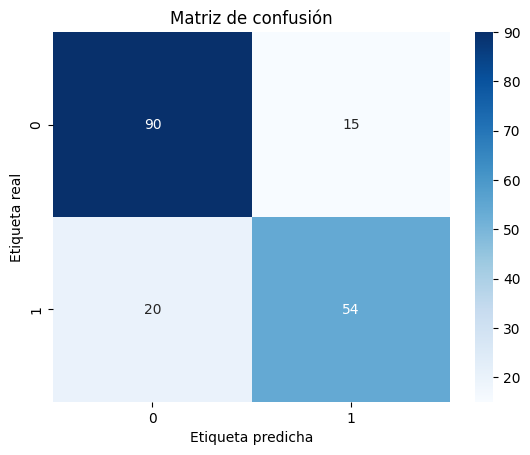

In [2]:
# ==============================================
# EJERCICIO 1 (FÁCIL): Clasificación binaria con Titanic
# Dataset: Titanic - Machine Learning from Disaster (Kaggle)
# Técnica: Regresión Logística
# ==============================================
# Paso 1: Importar bibliotecas necesarias
import pandas as pd # Para manejo de datos en forma de tablas
import numpy as np # Para operaciones numéricas
from sklearn.model_selection import train_test_split # Para dividir datos
from sklearn.linear_model import LogisticRegression # Modelo de clasificación
from sklearn.metrics import accuracy_score, confusion_matrix # Métricas
import seaborn as sns # Visualizaciones
import matplotlib.pyplot as plt # Gráficos
# Paso 2: Cargar el dataset
# Suponemos que el archivo 'train.csv' está en el mismo directorio que este código
# Si está en otra ruta, reemplazar la ruta por la correcta
df = pd.read_csv("../../Dataset/t/titanic/train.csv")
print("Vista previa de los datos:")
print(df.head())
# Paso 3: Seleccionar variables útiles para el modelo
# Usaremos: 'Pclass', 'Sex', 'Age', 'Fare' como características y 'Survived' como etiqueta
data = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()
# Paso 4: Preprocesamiento de los datos
# 4.1: Llenar valores faltantes en la columna 'Age' con la mediana
data['Age'].fillna(data['Age'].median(), inplace=True)
# 4.2: Convertir variable categórica 'Sex' en variable numérica
data = pd.get_dummies(data, columns=['Sex'], drop_first=True) # 'Sex_male' será 1 si es hombre, 0 si mujer
# Paso 5: Separar características (X) y etiqueta (y)
X = data.drop('Survived', axis=1) # Variables de entrada
y = data['Survived'] # Variable objetivo
# Paso 6: Dividir en datos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Paso 7: Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000) # Aumentamos el número máximo de iteraciones
model.fit(X_train, y_train)
# Paso 8: Realizar predicciones
predictions = model.predict(X_test)
# Paso 9: Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print(f"Precisión del modelo: {accuracy:.2f}")
# Matriz de confusión para entender errores
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de confusión")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.show()
# Explicación:
# - La precisión indica qué porcentaje de las predicciones fueron correctas.
# - La matriz de confusión muestra cómo se distribuyen los aciertos y errores:
# [ [TN, FP],
# [FN, TP] ]
# TN: verdaderos negativos, FP: falsos positivos,
# FN: falsos negativos, TP: verdaderos positivos